In [1]:
import numpy as np
import json
import sys
import os
import  matplotlib 
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
import seaborn as sns
import pdb 
import h5py

%pylab inline
%matplotlib inline

sns.reset_orig()

plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

# sns.set_style("ticks")

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

sns.set()

from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

import cv2

# config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"
config_file = "../configs/caffe2/e2e_mask_rcnn_R_101_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

cfg.MODEL.MASK_ON = False

Populating the interactive namespace from numpy and matplotlib


/home/mohit/anaconda2/envs/default_py35/lib/python3.5/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/mohit/anaconda2/envs/default_py35/lib/python3.5/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


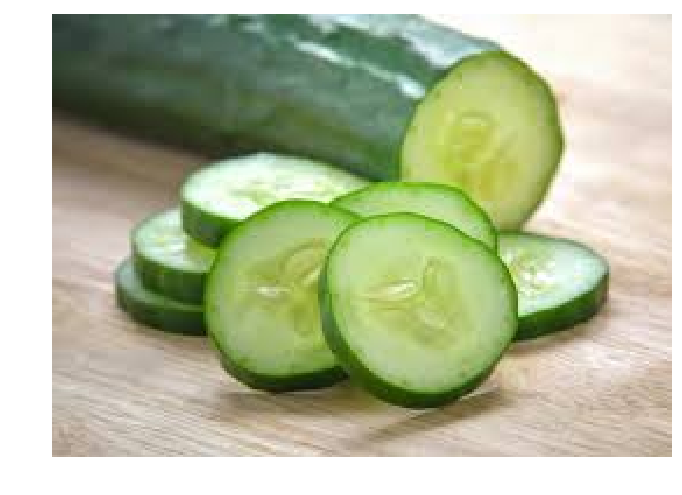

BoxList(num_boxes=18, image_width=266, image_height=190, mode=xyxy)


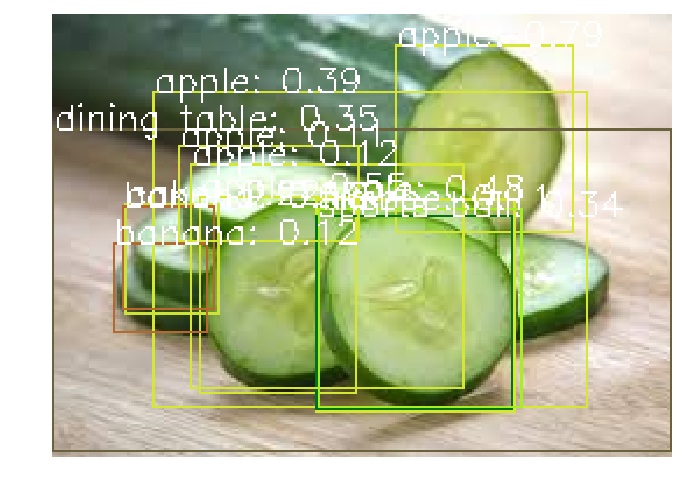

In [2]:
def visualize_image(img):
    plt.imshow(img[:, :, ::-1])
    plt.axis("off")
    plt.show()


def visualize_image_results(demo, image):
    predictions = demo.compute_prediction(image)
    top_predictions = demo.select_top_predictions(predictions)
    print(predictions)

    visual_predictions = demo.run_on_opencv_image(image)
    visualize_image(visual_predictions)
        
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.1,
)
# load image and then run prediction
# coco_demo Uses image in BGR format.
image = cv2.imread('/home/mohit/Datasets/cutting/cucumber_2.jpeg')
visualize_image(image)
visualize_image_results(coco_demo, image)

BoxList(num_boxes=27, image_width=1920, image_height=1080, mode=xyxy)


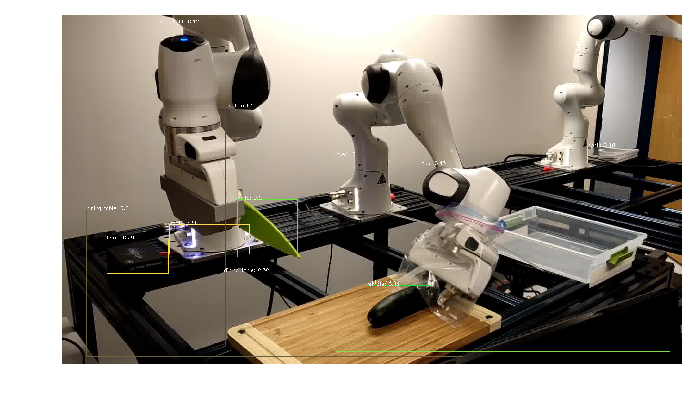

BoxList(num_boxes=12, image_width=1920, image_height=1080, mode=xyxy)


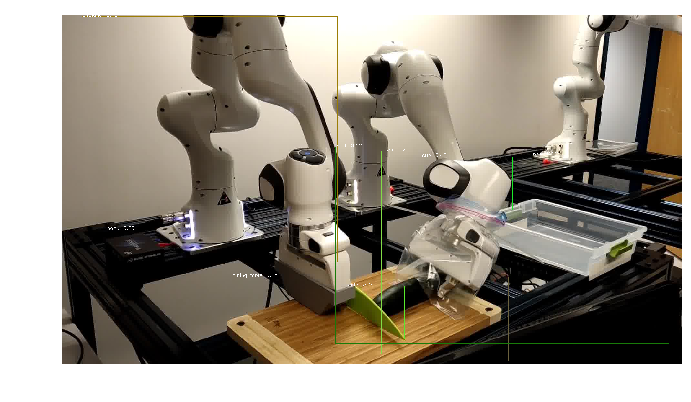

BoxList(num_boxes=21, image_width=1920, image_height=1080, mode=xyxy)


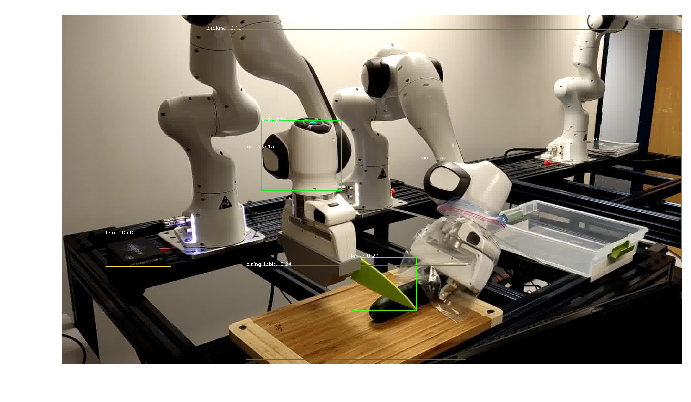

BoxList(num_boxes=13, image_width=1920, image_height=1080, mode=xyxy)


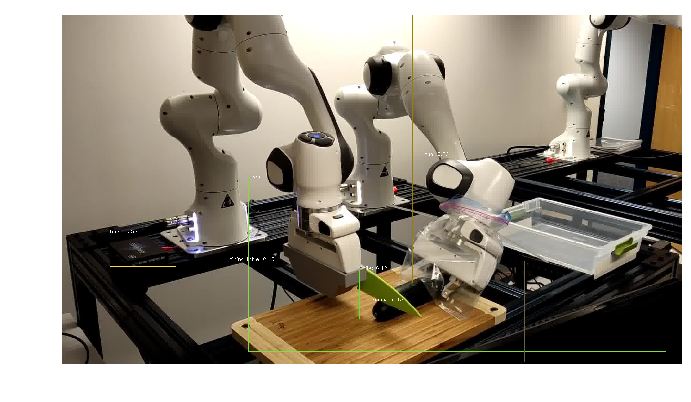

BoxList(num_boxes=19, image_width=1920, image_height=1080, mode=xyxy)


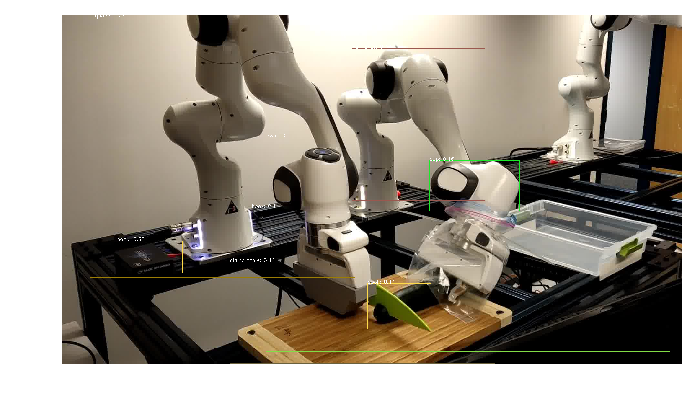

BoxList(num_boxes=15, image_width=1920, image_height=1080, mode=xyxy)


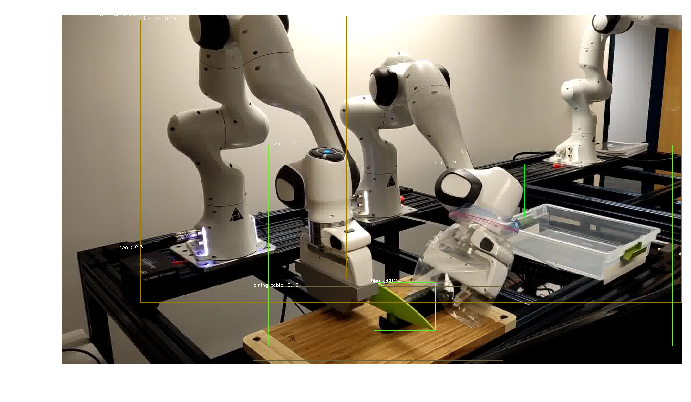

BoxList(num_boxes=12, image_width=1920, image_height=1080, mode=xyxy)


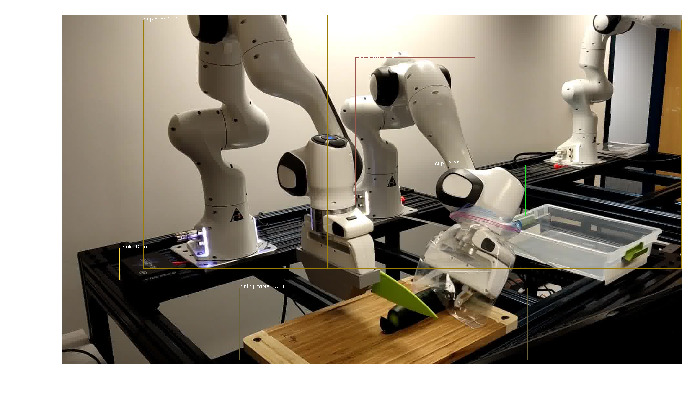

BoxList(num_boxes=15, image_width=1920, image_height=1080, mode=xyxy)


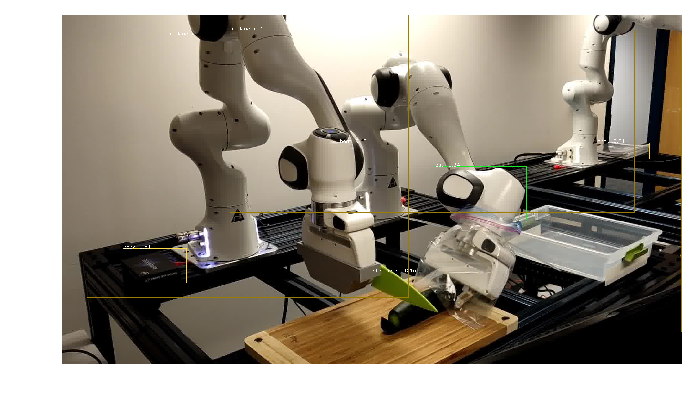

BoxList(num_boxes=20, image_width=1920, image_height=1080, mode=xyxy)


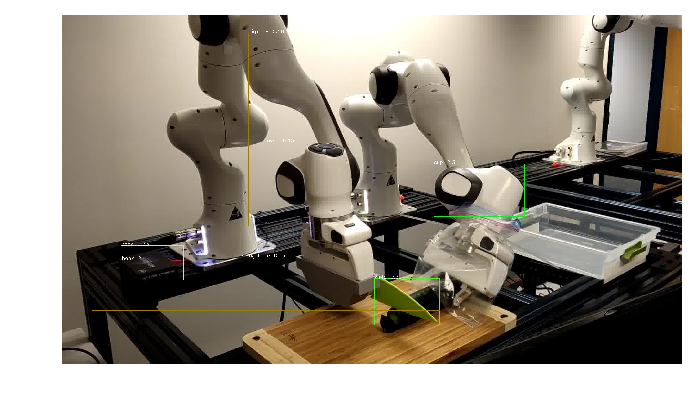

BoxList(num_boxes=18, image_width=1920, image_height=1080, mode=xyxy)


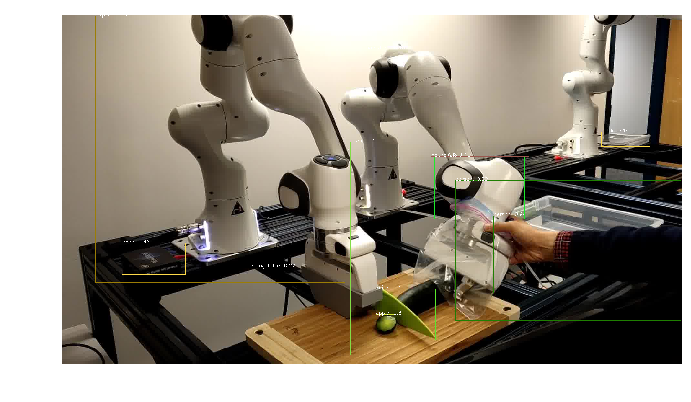

In [3]:
image_dir = '/home/mohit/Datasets/cutting/robot_data_1/demo_1_width_512/'
VIS_IMAGE_DIR = True

if VIS_IMAGE_DIR:
    assert os.path.exists(image_dir) and os.path.isdir(image_dir), \
        "Cannot load image dir {}".format(image_dir)
    # visualize image dir
    for f in sorted(os.listdir(image_dir)):
        full_path = os.path.join(image_dir, f)
        is_img = full_path.endswith('jpg') or full_path.endswith('jpeg') or full_path.endswith('png')
        if os.path.isfile(full_path) and is_img:
            img = cv2.imread(full_path)
            assert img is not None and type(img) is np.ndarray, \
                "Image did not load {}".format(full_path)
            visualize_image_results(coco_demo, img)